In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid")
DATA_DIR = Path('../../') / 'COSMOS/Lecture 3' 

In [105]:
csv_path = DATA_DIR / 'ca_air_pollution_2023.csv'
air_quality = pd.read_csv(csv_path)

csv_path = DATA_DIR / 'ca_income_2023.csv'
income_data = pd.read_csv(csv_path)

merged_df = pd.merge(air_quality, income_data)

merged_df

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

filtered_df = remove_outliers_iqr(merged_df, 'Per Capita Income (Dollars) from 2023')
filtered_df = remove_outliers_iqr(filtered_df, 'Air Pollution (PM2.5)')

filtered_df

,County in CA,Air Pollution (PM2.5),Per Capita Income (Dollars) from 2023
0,Alameda County,11.8,106657
1,Alpine County,9.7,75395
2,Amador County,14.2,50020
3,Butte County,16.1,56847
4,Calaveras County,12.7,58425
5,Colusa County,12.8,58303
6,Contra Costa County,11.1,103218
7,Del Norte County,10.3,47141
8,El Dorado County,14.6,84533
9,Fresno County,20.3,52728


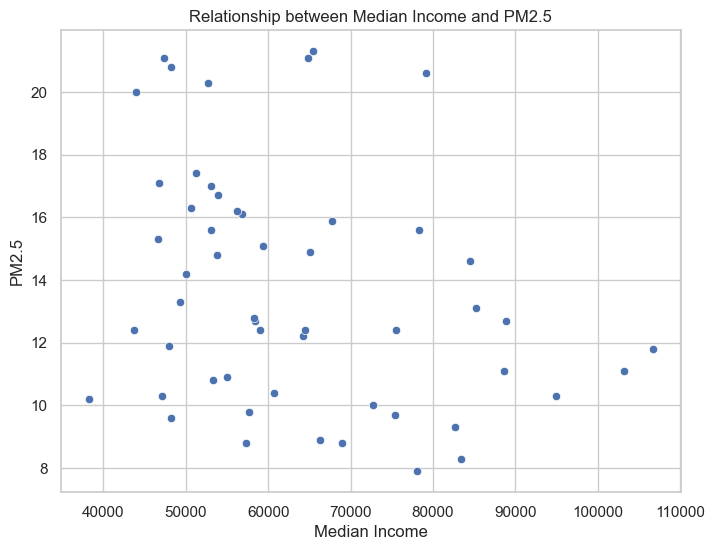

In [106]:
# Scatter plot: Median Income vs PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Per Capita Income (Dollars) from 2023', y="Air Pollution (PM2.5)")
plt.xlabel('Median Income')
plt.ylabel('PM2.5')
plt.title('Relationship between Median Income and PM2.5')
plt.show()

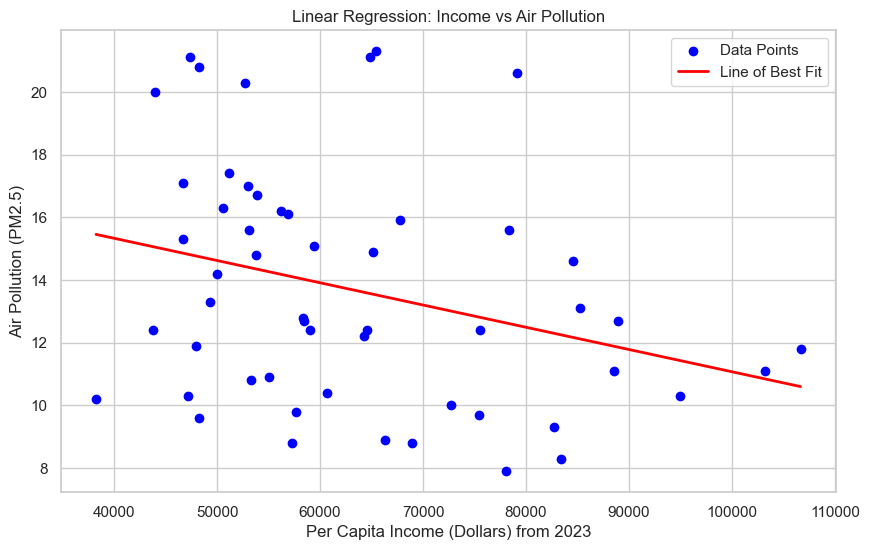

In [107]:
X = filtered_df[['Per Capita Income (Dollars) from 2023']]
y = filtered_df['Air Pollution (PM2.5)']

model = LinearRegression()
model.fit(X, y)

x_vals = np.linspace(X.min().values[0], X.max().values[0], 100)
x_vals_df = pd.DataFrame(x_vals, columns=['Per Capita Income (Dollars) from 2023'])

y_pred = model.predict(x_vals_df)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_vals, y_pred, color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('Per Capita Income (Dollars) from 2023')
plt.ylabel('Air Pollution (PM2.5)')
plt.title('Linear Regression: Income vs Air Pollution')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
r = filtered_df['Per Capita Income (Dollars) from 2023'].corr(filtered_df['Air Pollution (PM2.5)'])
print(f"Correlation coefficient (r): {r}")

Correlation coefficient (r): -0.30125260566304085
